In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import time
import kornia as K
import torch
import cv2
from DatasetTools.LeafImageSeries import LeafDataset
from utils import convert_image_to_tensor, crop_img
from plotting import plot_overlay

<frozen importlib._bootstrap_external>:1329: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
/layers/paketo-buildpacks_poetry-install/poetry-venv/datascience-python-renku-dependencies-xS3fZVNL-py3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.randint(0, 10, size=(2,3))

array([[7, 9, 7],
       [3, 6, 2]])

In [3]:
img_path = "~/work/leaf-image-sequences/raw/2023/20230525/20230525_172420_ESWW0070020_1.JPG"

In [4]:
os.path.exists("../leaf-image-sequences/raw/")

True

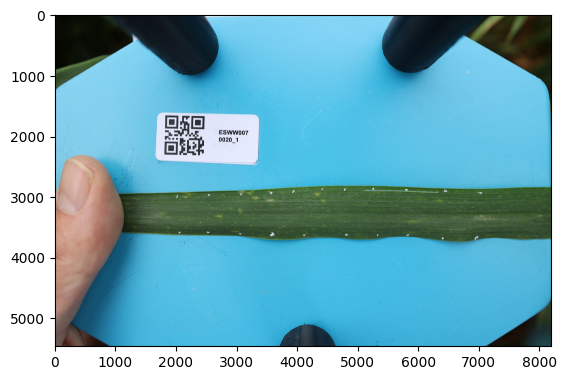

In [5]:
img_path = "../leaf-image-sequences/raw/2023/20230525/20230525_172420_ESWW0070020_1.JPG"
image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

In [7]:
image = mpimg.imread(img_path)

In [3]:
# check existence of a path
# pth = "../leaf-image-sequences/raw/2023/20230525/20230525_172420_ESWW0070020_1.JPG"
# pth = "../leaf-image-sequences/raw/2023/20230525/20230525_172617_ESWW0070020_2.JPG"
pth = "../leaf-image-sequences/raw/2023/20230525/20230525_172841_ESWW0070020_4.JPG"
# pth = "../leaf-image-sequences/raw/2023/20230525/20230525_172942_ESWW0070020_5.JPG"
start = time.time()
exist = os.path.exists(pth)
end = time.time()
print(f"Path exists: {exist}, checked in {end - start:.6f} seconds")

times = np.zeros(13)
for i in range(13):
    print("--------------------------------")
    pause_len = int(i*5)
    print(f"Wait {pause_len} seconds...")
    time.sleep(pause_len)

    # check existence of same path. speed up?
    print("Checking path existence again...")
    start = time.time()
    exist = os.path.exists(pth)
    end = time.time()
    time_diff = end - start
    times[i] = time_diff
    print(f"Checked in {time_diff:.6f} seconds")

Path exists: True, checked in 38.779420 seconds
--------------------------------
Wait 0 seconds...
Checking path existence again...
Checked in 0.000176 seconds
--------------------------------
Wait 5 seconds...
Checking path existence again...
Checked in 0.000351 seconds
--------------------------------
Wait 10 seconds...
Checking path existence again...
Checked in 11.539581 seconds
--------------------------------
Wait 15 seconds...
Checking path existence again...
Checked in 38.776747 seconds
--------------------------------
Wait 20 seconds...
Checking path existence again...
Checked in 4.101601 seconds
--------------------------------
Wait 25 seconds...
Checking path existence again...
Checked in 26.795514 seconds
--------------------------------
Wait 30 seconds...
Checking path existence again...
Checked in 0.000406 seconds
--------------------------------
Wait 35 seconds...
Checking path existence again...
Checked in 38.769269 seconds
--------------------------------
Wait 40 secon

In [10]:
# do something else
print("Doing something else...")
np.random.rand(3,3)

# check existence of same path. still speed up?
start = time.time()
exist = os.path.exists(pth)
end = time.time()
print(f"Path exists: {exist}, checked in {end - start:.6f} seconds")

Doing something else...
Path exists: True, checked in 5.947701 seconds


## Images for Data Overview

In [2]:
base_dir = '../leaf-image-sequences'
# base_dir = '../leaf-image-sequences-subset'
# base_dir = '../test-webdav-connection'
assert os.path.exists(base_dir), "Path to base directory invalid"
assert os.path.exists(base_dir+'/raw'), "Base directory empty"

leaf = LeafDataset(
    base_dir=base_dir,
    # leaf_uid="ESWW0090057_18", 
    leaf_uid="ESWW0070020_1", 
    # load=('images', 'rois', 'tforms', 'target_masks', 'leaf_masks', 'instance_masks', 'det_masks', 'seg_masks', 'target_images', "keypoints")
    load=('target_images', 'target_masks', 'leaf_masks', 'seg_masks', 'cropped_images', 'rois', 'images', 'keypoints'),
    verbose=True
)

Initializing dataset...
Getting Series...
Getting paths...
Extracting IDs...
Removing duplicate IDs...
Filtering by leaf_uid...
Compiling list...
Loading requested values...
Loading images...
Loading cropped images...
Loading ROIs...
Loading Target Masks...
Loading Leaf Masks...
Loading Segmentation Masks...
Loading target images...
Loading keypoints...


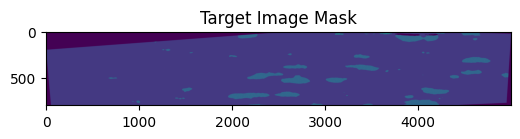

In [57]:
ind = 11
fig = plt.figure(figsize=(6,9))
img = plt.imshow(leaf.target_masks[ind])
plt.title(f"Target Image Mask")
# plt.colorbar(img, orientation='horizontal', fraction=.1)
plt.show()

In [58]:
test = convert_image_to_tensor(leaf.target_masks[ind])

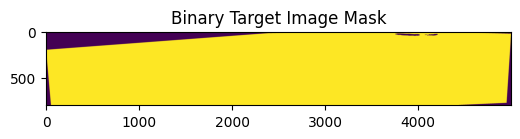

In [59]:
test[test!=0] = 1
fig = plt.figure(figsize=(6,9))
img = plt.imshow(K.tensor_to_image(test))
plt.title("Binary Target Image Mask")
# plt.colorbar(img, orientation='horizontal', fraction=.1)
plt.show()

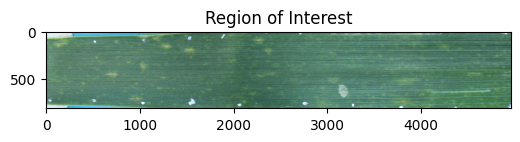

In [10]:
ind = 2
img = convert_image_to_tensor(leaf.images[ind])
H, W = img.shape[2], img.shape[3]
roi = leaf.rois[ind]
rot_mat = roi["rotation_matrix"]
bbox = roi["bounding_box"]
keypoints = leaf.keypoints[ind]
rot_mat = np.asarray(rot_mat)
bbox = np.asarray(bbox)

# rotate and crop to ROI
img = K.geometry.transform.warp_affine(img, torch.Tensor(rot_mat).unsqueeze(0), (H, W)) #, align_corners=True)
img = crop_img(img, bbox[:,0].min(), bbox[:,0].max()-1, bbox[:,1].min(), bbox[:,1].max()-1)

fig = plt.figure(figsize=(6,9))
img = plt.imshow(K.tensor_to_image(img))
plt.title("Region of Interest")
# plt.colorbar(img, orientation='horizontal', fraction=.1)
plt.show()

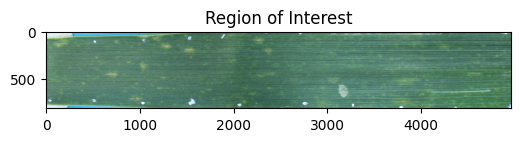

In [26]:
img = K.tensor_to_image(convert_image_to_tensor(leaf.images[ind]))

roi = leaf.rois[ind]
M_img= np.asarray(roi["rotation_matrix"])
rows, cols = img.shape[0], img.shape[1]
img_rot = cv2.warpAffine(img, M_img, (cols, rows))

# crop
box = np.asarray(roi["bounding_box"])
crop = img_rot[box[0][1]:box[2][1], box[0][0]:box[1][0]]
fig = plt.figure(figsize=(6,9))
plt.imshow(crop)
plt.title("Region of Interest")
# plt.colorbar(img, orientation='horizontal', fraction=.1)
plt.show()

(21, 2)


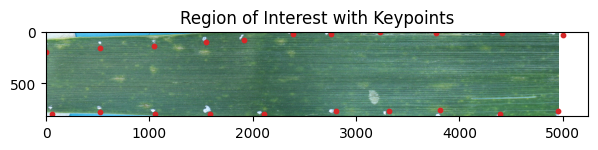

In [27]:
keypoints = leaf.keypoints[ind]
print(keypoints.shape)
fig = plt.figure(figsize=(7,9))
plt.imshow(crop)
plt.title("Region of Interest with Keypoints")
plt.scatter(keypoints[:,0], keypoints[:,1], color="tab:red", s=10)
plt.show()

In [37]:
crop.shape

(818, 4959, 3)

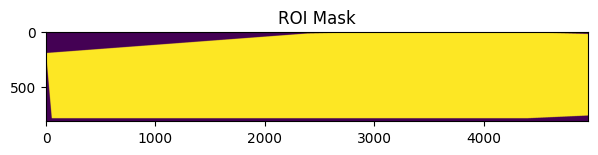

In [42]:
H,W,C = crop.shape

hull = cv2.convexHull(keypoints.astype(np.int32)) # Computes the convex hull of the keypoints.
mask = np.zeros((H,W), dtype=np.uint8) # initialize empty mask
cv2.fillConvexPoly(mask, hull.reshape(-1,2), 1) # fill in convex hull with value 1


fig = plt.figure(figsize=(7,9))
plt.imshow(mask)
plt.title("ROI Mask")
# plt.colorbar(img, orientation='horizontal', fraction=.1)
plt.show()

In [46]:
print(crop.shape)
print(mask.shape)

(818, 4959, 3)
(818, 4959)


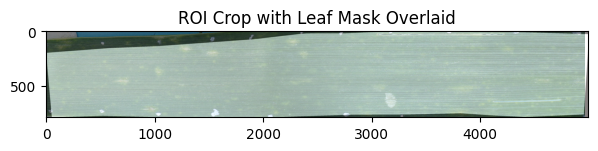

In [65]:
fig = plt.figure(figsize=(7,9))
plt.imshow(crop, cmap='gray')
plt.imshow(leaf.leaf_masks[2], cmap='hot', alpha=0.5)
plt.title("ROI Crop with Leaf Mask Overlaid")
# plt.axis('off')
plt.show()

In [64]:
print(convert_image_to_tensor(leaf.leaf_masks[2]).shape)
print(crop.shape)
print(convert_image_to_tensor(leaf.target_masks[2]).shape)

torch.Size([1, 1, 791, 4999])
(818, 4959, 3)
torch.Size([1, 1, 791, 4999])
